# Ford GoBike System Data Year 2017
## by (Mashari Almuhanna)

## Investigation Overview

> In this investigation i wanted to stude the Ford GoBike System Data for the year 2017 and explore the relationships and to have some findings to use 

>The main focus was on the four columns of the cycling trips: duration, user_type, Day_of_week,month.
## Dataset Overview

> The dataset consists of information about user_type,duration of bike trips,and the area in which the member has started driving and ended,the start time of trip,the end time of trip.  the dataset is large, it contains five hundred thousand rows..

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# here to make useful of the start time and added the month and day of week to analyze them.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['month'] = df['start_time'].apply(lambda x: x.strftime('%B').lower())
df['day_of_week'] = df['start_time'].apply(lambda x: x.strftime('%A').lower())

In [4]:
# add the duration_min to have easier understand of the durtion 
df['duration_min']= df['duration_sec'] / 60

In [5]:
def add_value_labels(ax, spacing=5):
   
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there. 
# i used "https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart" to made this 

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> From that we know that the subscribers are the majority with large deffrince than customers.

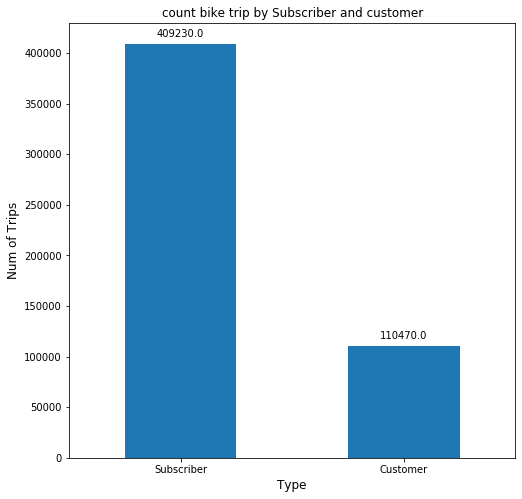

In [6]:
axx=df.user_type.value_counts().plot(kind='bar',figsize=(8,8))
axx.set_xlabel("Type",fontsize=12)
axx.set_ylabel("Num of Trips",fontsize=12)
plt.title('count bike trip by Subscriber and customer');
plt.xticks(rotation = 0)
add_value_labels(axx)


## (Visualization 2)

> As we can see that on weekends the users are using there bikes longer than the rest of weekdays

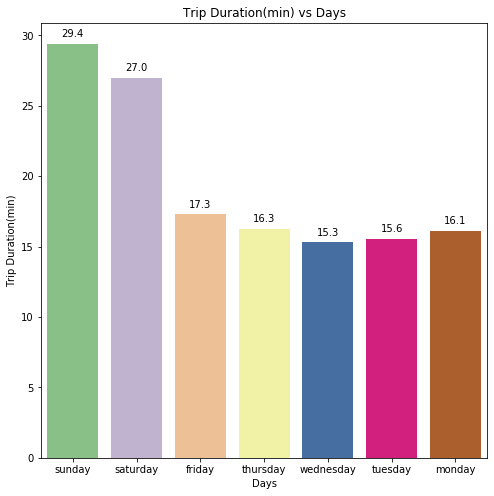

In [7]:
plt.figure(figsize = [8,8])
axx = sb.barplot(data=df,x='day_of_week',y='duration_min', color=sb.color_palette()[0], palette="Accent", ci=None)
plt.xlabel('Days')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Days');
plt.xticks(rotation = 0)
add_value_labels(axx)

## (Visualization 3)
>from that we saw that customers oftenly using the bike much longer duration than the subscribers on months period


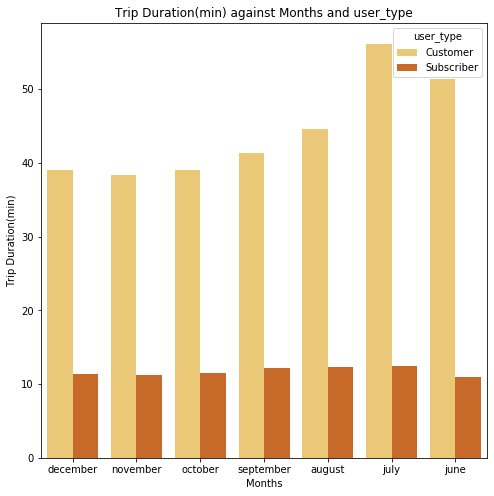

In [8]:
plt.figure(figsize = [8,8]);
axx = sb.barplot(data=df,x='month',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='YlOrBr', ci=None);
plt.xlabel('Months');
plt.ylabel('Trip Duration(min)');
plt.title('Trip Duration(min) against Months and user_type');
plt.xticks(rotation = 0);


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
! jupyter nbconvert Ford_Go_bike_slides.ipynb --to slides --template output_toggle.tpl --post serve